# Personal Stock Portfolio Management App

**Author:** Sonia Sun  
**Date:** April 13, 2025  
**Course:** CST2101 BI Programming Milestone Project 2

## Objective
A simple-to-use application that keeps track of a stock portfolio, purchase price, selling price, current stock price, and provides insights such as top-performing stock, break-even price, total return, etc. to the user.

---

## Initial Findings

- **Reliable Data Source**: While there are many APIs available to retrieve financial data, the Python library `yfinance` (Yahoo Finance) is one of the most-used and reliable sources. Its functionality is more than enough to cover the needs of this project.  
- **Ticker Validation**: It is crucial to enter the correct stock ticker or symbol. Therefore, a mechanism should be in place to validate if the user enters a valid ticker.  
- **Complexity of Performance Calculations**: Stock portfolio performance calculations can be very complicated and sophisticated. There are many ways to calculate realized profit/loss, unrealized profit/loss, and to measure performance by time-weighted vs. money-weighted metrics. For the scope of this project, a simplified set of formulas will be established to perform straightforward calculations on the stocks in the portfolio.

---

## Methodologies

### Data Collection and Storage

- **Data Volume**: Since this app targets personal use, the volume of data can be managed using a flat file (e.g., CSV). Portfolio information can be manually entered by the user via the app or the CSV can be updated directly as needed.  
- **Real-Time Stock Price and Ticker Validation**: Implemented using the Python library `yfinance`.

### Portfolio Performance Calculation and Visualization

- **Descriptive Statistics**:  
  - The app displays a summary of current stock prices, average cost, quantity, profit/loss, and returns as a chart.  
  - Calculations are done on an ad-hoc basis to ensure the most up-to-date data.  
  - Performance calculation is implemented in the function `_get_performance()`. Formulas are simplified as follows:
    - **Total Shares / Shares on hand** = Sum of all shares (positive + negative)  
    - **Total Cost** = Sum(buy_shares * buy_price) + Sum(sell_shares * sell_price)  
    - **Average Cost** = Total Cost / Total Shares  
    - **Current Value** = Total Shares * current_price  
    - **Profit (when shares == 0)** = Total selling amount - Total invested amount  
    - **Profit (when shares > 0)** = Current Value - Total Cost  
    - **Return%** = (Profit / Total Cost) * 100  

- **Visualization**:  
  - Use plots (e.g., line charts, bar charts, pie charts) to identify ranking, trends, and outliers in the data.



---------- Stock Portfolio Menu ----------
1. Add transaction
2. Display portfolio performance
3. Visualize portfolio
4. Exit


Choose an option (1-4):  3



********** Visualization Menu **********
1. Profit/Loss by Ticker
2. Return Percentage by Ticker
3. Return % Boxplot
4. Portfolio Composition
5. Display Stock Movement in past year
6. Return to main menu


Choose an option (1-6):  4


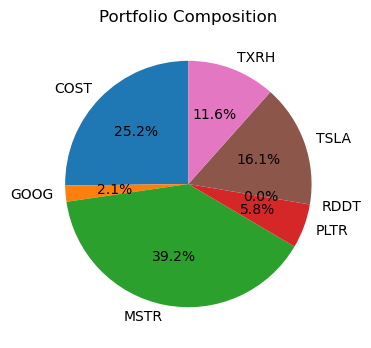


********** Visualization Menu **********
1. Profit/Loss by Ticker
2. Return Percentage by Ticker
3. Return % Boxplot
4. Portfolio Composition
5. Display Stock Movement in past year
6. Return to main menu


Choose an option (1-6):  3


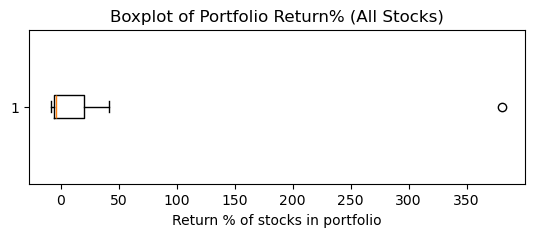


********** Visualization Menu **********
1. Profit/Loss by Ticker
2. Return Percentage by Ticker
3. Return % Boxplot
4. Portfolio Composition
5. Display Stock Movement in past year
6. Return to main menu


In [ ]:
"""
    CST2101 BI Programming Milestone Project 2
    Project name: Personal Stock Portfolio Management App
    Author: Sonia Sun
    Date: April 13, 2025
"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import logging
from IPython.display import display


class StockPortfolio:
    def __init__(self, csv_file='portfolio.csv'):
        """
        Initialize StockPortfolio class with a path to the portfolio.csv file
        """
        self.csv_file = csv_file

        # If file doesn't exist, create it
        if not os.path.exists(self.csv_file):
            df = pd.DataFrame(columns=['Ticker', 'Shares', 'Price', 'Date'])
            df.to_csv(self.csv_file, index=False)

        self._load_data()

    def _load_data(self):
        """Load portfolio.csv file into pandas DataFrame"""
        self.df = pd.read_csv(self.csv_file)

    def _save_data(self):
        """Save the current DataFrame back to the CSV file"""
        self.df.to_csv(self.csv_file, index=False)

    def _check_ticker(self, ticker):
        """check ticker exists in yfinance library"""
        # suppress unwanted non-critical logging message
        logging.getLogger("yfinance").setLevel(logging.CRITICAL)
        try:
            stock_data = yf.Ticker(ticker)
            # Attempt to fetch some data (like 1 day of historical)
            if stock_data.history(period='1d').empty:
                return None
            return 1
        except Exception:
            # catch any other errors yfinance might raise
            return None

    def add_transaction(self):
        """Option 1 - Add new transaction to portfolio CSV file"""
        # get transaction information and check for invalid values
        try:
            while True:
                # check if ticker exists
                ticker = input("Enter stock ticker (ex. AAPL): ")
                is_valid_ticker = self._check_ticker(ticker)
                if (is_valid_ticker is not None):
                    break
                print("Invalid ticker. Try again.")

            while True:
                # number of shares cannot be zero
                shares = int(input("Enter number of shares (positive for buy, negative for sell): "))
                if shares != 0:
                    break
                print("Shares cannot be zero. Try again.")
            
            # convert price a positive number
            price = abs(float(input("Enter price per share: ")))

            # check if input date format is correct
            while True:
                date = input("Enter the transaction date (YYYY-MM-DD): ")
                if (bool(datetime.strptime(date, "%Y-%m-%d"))):
                    break
                print("Invalid date format! Please use YYYY-MM-DD.")

            # Append a new row to the dataframe
            new_row = {
                'Ticker': ticker.upper().strip(),
                'Shares': shares,
                'Price': price,
                'Date': date
            }
            new_data = pd.DataFrame([new_row])
            self.df = pd.concat([self.df, new_data], ignore_index=True)
            self._save_data()
            print("Transaction added successfully!")
        
        except ValueError as ve:
            print(f"Error: {str(ve)}")
        except PermissionError as ve:
            print(f"{str(ve)}. Make sure the file is not open.")
        except Exception as e:
            print(f"An unexpected error occurred: {str(e)}")

    def display_portfolio(self):
        """
        Option 2 - Display current holdings and performance metrics.
        """
       
        if self.df.empty:
            print("No transactions found.")
            return
        
        pd.set_option('display.max_columns', None)
        pd.set_option('display.max_rows', None)

        # get portfolio performance
        portfolio_summary = self._get_performance(self.df)

        if not portfolio_summary:
            print("No open positions to display.")
            return
        
        # convert list into pandas dataframe for output
        summary_df = pd.DataFrame(portfolio_summary)
        display(summary_df)
    
    def visualize_portfolio(self):
        """
        Option 3 - Show data visualizations: 
        """
        if self.df.empty:
            print("No transactions to visualize.")
            return
        
        # get portfolio performance
        portfolio_summary = self._get_performance(self.df) 

        if not portfolio_summary:
            print("No open positions to visualize.")
            return
        
        vis_df = pd.DataFrame(portfolio_summary)
       
        while True:
            print("\n********** Visualization Menu **********")
            print("1. Profit/Loss by Ticker")
            print("2. Return Percentage by Ticker")
            print("3. Return % Boxplot")
            print("4. Portfolio Composition")
            print("5. Display Stock Movement in past year")
            print("6. Return to main menu")
            user_choice = input("Choose an option (1-6): ")
            match user_choice:
                case '1':  # Graph#1 - Plot profit/loss in descending order
                    sorted_df = vis_df.sort_values(by='Profit/Loss', ascending=False)
                    ax = sns.barplot(x='Ticker', y='Profit/Loss', data=sorted_df, 
                                    order=sorted_df['Ticker'])
                    plt.title('Profit/Loss by Ticker')
                    plt.xlabel('Ticker')
                    plt.xticks(rotation=45)
                    plt.ylabel('Profit/Loss ($)')
                    plt.axhline(0, color='red', linewidth=1)
                    # Annotate each bar with its profit/loss value
                    for bar in ax.patches:
                        height = bar.get_height()
                        # Adjust the text position based on positive or negative height
                        if height >= 0:
                            va = 'bottom'
                            offset = 5
                        else:
                            va = 'top'
                            offset = -5
                        ax.annotate(f'{height:.2f}',
                                    xy=(bar.get_x() + bar.get_width() / 2, height),
                                    xytext=(0, offset),  # Vertical offset in points
                                    textcoords="offset points",
                                    ha='center', va=va, color='black')
                    plt.tight_layout()
                    plt.show()
                            
                case '2':  # Graph#2 - Plot return % in descending order
                    sorted_ret_df = vis_df.sort_values(by='Return %', ascending=False)
                    ax = sns.barplot(x='Ticker', y='Return %', data=sorted_ret_df)
                    plt.title('Return Percentage by Ticker')
                    plt.xlabel('Ticker')
                    plt.xticks(rotation=45)
                    plt.ylabel('Return %')
                    plt.axhline(0, color='red', linewidth=1)
                    for bar in ax.patches:
                        height = bar.get_height()
                        # Adjust the text position based on positive or negative height
                        if height >= 0:
                            va = 'bottom'
                            offset = 5
                        else:
                            va = 'top'
                            offset = -5
                        ax.annotate(f'{height:.2f}',
                                    xy=(bar.get_x() + bar.get_width() / 2, height),
                                    xytext=(0, offset),  # Vertical offset in points
                                    textcoords="offset points",
                                    ha='center', va=va, color='black')
                    plt.tight_layout()
                    plt.show()
               
                case '3':  # Graph#3 - Plot return % in using boxplot
                    all_returns = vis_df['Return %']
                    plt.figure().set_figheight(2)
                    # Create a single boxplot for the entire portfolio
                    plt.boxplot(all_returns,autorange=True, vert = 0)
                    plt.xlabel("Return % of stocks in portfolio")
                    plt.ylabel('')
                    plt.title("Boxplot of Portfolio Return% (All Stocks)")
                    plt.show()

                case '4':  # Graph#4 - Show % of portfolio of each ticker
                    plt.figure(figsize=(4, 4))
                    plt.pie(vis_df['Current Value'], labels=vis_df['Ticker'], autopct='%1.1f%%', startangle=90)
                    plt.title("Portfolio Composition")
                    plt.show()
                
                case '5':  # Graph#5 - Show daily stock movement in past year
                    ticker = input("Enter stock ticker (ex. AAPL): ")
                    stock = yf.Ticker(ticker)
                    hist = stock.history(period='1y', interval='1d')
                    
                    if hist.empty:
                        print(f"No historical data available for ticker: {ticker}")
                        return
                    
                    plt.figure(figsize=(10, 6))
                    plt.plot(hist.index, hist['Close'], linestyle='-', label=ticker)
                    plt.xlabel("Date")
                    plt.ylabel("Closing Price")
                    plt.title(f"{ticker} Price Movement (1Y)")
                    plt.xticks(rotation=45)
                    plt.legend()
                    plt.tight_layout()
                    plt.show()

                case '6':
                    print("Returning to main menu...")
                    break
            
                case _:
                    print("Invalid choice. Please try again.")

    def _get_performance(self, df):
        """Calculate performance of each stock in portfolio
          For each ticker:
            - Total Shares/Shares on hand = sum of all shares (positive + negative)
            - Total Cost = sum(buy_shares * buy_price) + sum(sell_shares * sell_price).
            - Average Cost = Total Cost / Total Shares
            - Current Value = Total Shares * current_price
            - Profit (when shares is 0)= Total selling amount - Total invested amount
            - Profit (shares > 0) = Current Value - Total cost
            - Return% = (Profit / Total Cost) * 100
        """
        # group the dataframe by ticker
        ticker_list = df.groupby('Ticker')
        portfolio_summary = []

        for ticker, group in ticker_list:
            ticker_name = self.get_ticker_name(ticker)
            # Sum of all shares for that ticker
            # If a ticker has been completely sold, share_num will be 0
            share_sum = group['Shares'].sum()
            
            # Compute total buy amount and total sell amount (ignoring sign for sells)
            total_buy_amount = (
                group.loc[group['Shares'] > 0, 'Shares'] 
                * group.loc[group['Shares'] > 0, 'Price']
            ).sum()

            total_sell_amount = (
                group.loc[group['Shares'] < 0, 'Shares'].abs() 
                * group.loc[group['Shares'] < 0, 'Price']
            ).sum()
                       
            # get real-time price of ticker
            current_price = self.get_current_price(ticker)
            if current_price is None:
                current_price = 0

            if share_sum > 0:  # still have position left
                # total cost = sum(Shares * Price)
                # If total_cost > 0, then ticker purchase price is higher than sold price, if any
                # If total_cost < 0, then the ticker has been sold at a higher price than purchase price
                total_cost = (group['Shares'] * group['Price']).sum()
                average_cost = total_cost / share_sum
                profit = (current_price - average_cost) * share_sum
                current_value = share_sum * current_price
                return_pct = 0
                if total_cost != 0:
                    return_pct = (profit / total_cost) * 100
           
            else:  # no open position left
                average_cost = 0
                current_value = 0
                profit = total_sell_amount - total_buy_amount
                return_pct = profit/total_buy_amount * 100.00

            # add info to list as dictionary
            portfolio_summary.append({
                'Ticker': ticker,
                'Net Shares': share_sum,
                'Average Cost': round(average_cost, 2),
                'Current Price': round(current_price, 2),
                'Total Cost': round(total_cost, 2),
                'Total Purchases': round(total_buy_amount, 2),
                'Total Sells': round(total_sell_amount, 2),
                'Current Value': round(current_value, 2),
                'Profit/Loss': round(profit, 2),
                'Return %': round(return_pct, 2),
                'Name': ticker_name
            })

        return portfolio_summary

    
    def get_ticker_name(self, ticker):
        info = yf.Ticker(ticker).info
        return info.get("shortName")

    def get_current_price(self, ticker):
        """
        Retrieve the current stock price from yfinance (last close)
        """
        try:
            stock_data = yf.Ticker(ticker)
            current_price = stock_data.history(period='1d')['Close'].iloc[-1]
            return current_price
        except Exception as e:
            print(f"Error retrieving price for {ticker}: {str(e)}")
            return None


def main():
    # default path is C:/Users/xxxx/portfolio.csv
    portfolio = StockPortfolio(csv_file='portfolio.csv')

    # prompt user to select an option
    while True:
        print("\n---------- Stock Portfolio Menu ----------")
        print("1. Add transaction")
        print("2. Display portfolio performance")
        print("3. Visualize portfolio")
        print("4. Exit")
        user_choice = input("Choose an option (1-4): ")
        match user_choice:
            case '1':
                # Add transaction
                portfolio.add_transaction()
            
            case '2':
                # Display portfolio performance
                portfolio.display_portfolio()

            case '3':
                # Visualize data
                portfolio.visualize_portfolio()

            case '4':
                print("Exiting the application...")
                break
        
            case _:
                print("Invalid choice. Please try again.")


if __name__ == '__main__':
    main()
